# The influence of population growth on the forest size and individual income between 1990 and 2015 in Brazil and China.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
There are clues indicating to relationship between increasing population and negatively affects on income level per individual and the forest area. This data is analysied to show to what extent that this relation is ture. Selected countries, China and Brazil, have economic boom last 5 decades. The project is going to examine the population growth rate  and forest area data as well as seeking the relation between them. Also, the project examises the impact of population rate on an individaul income rate of the selected countries. 

## The aim of project is to answer that
### 1. what is the relation between population growth rate and forest area in Brazil and China?  
### 2. what is the relation between population growth rate and individual income in Brazil and China? 

<a id='wrangling'></a>
## Data wrangling

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
%matplotlib inline

In [3]:
#Loading the files 
pop= pd.read_csv('population_total.csv')
i= pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
f= pd.read_csv('forest_area_sq_km.csv')

In [4]:
# To check up data 
def discover(x):
    print('General info :')
    print(x.info())
    print('How many duplications?')
    print(x.duplicated().sum())
    print('Any Null?')
    print(x.isnull().sum().any())

In [5]:
#Check the existing of data 
def index(data,c1,c2,start,end): 
    print(f'The index of '+c1+' is ')
    print(data[data.country == c1].iloc[:, range(0).count])
    print(f'The index of '+ c2 +' is ')
    print(data[data.country == c2].iloc[:, range(0).count])    
    print(f'The index of '+start +' is')
    print(data.columns.get_loc(start))
    print(f'The index of '+end +' is ')
    print(data.columns.get_loc(end))

<a id='wrangling'></a>
## Clean  population Data 

In [6]:
discover(pop) #to get general information about population data

General info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: int64(301), object(1)
memory usage: 460.2+ KB
None
How many duplications?
0
Any Null?
False


In [7]:
index(pop,'Brazil','China','1990','2015') # to check existing of requirement in the data

The index of Brazil is 
23    Brazil
Name: country, dtype: object
The index of China is 
35    China
Name: country, dtype: object
The index of 1990 is
191
The index of 2015 is 
216


In [8]:
#build new data frame
Selected= ['Brazil','China']
df = pop[pop['country'].isin(Selected)] 
fr1= df.iloc[:, [0]] 
fr2= df.iloc[:, 191:217] 
popfr = fr1.join([fr2], how='inner', on=None)

In [9]:
#arrangment table 
popfr1= popfr.transpose()
popfr1.columns= ['Brazil','China']
pop_frame= popfr1.drop(['country'])

<a id='wrangling'></a>
## Clean Forest Data 

In [10]:
discover(f)#to get general information about Forest data

General info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  193 non-null    object 
 1   1990     190 non-null    float64
 2   1991     190 non-null    float64
 3   1992     190 non-null    float64
 4   1993     191 non-null    float64
 5   1994     191 non-null    float64
 6   1995     191 non-null    float64
 7   1996     191 non-null    float64
 8   1997     191 non-null    float64
 9   1998     191 non-null    float64
 10  1999     191 non-null    float64
 11  2000     191 non-null    float64
 12  2001     191 non-null    float64
 13  2002     191 non-null    float64
 14  2003     191 non-null    float64
 15  2004     191 non-null    float64
 16  2005     191 non-null    float64
 17  2006     191 non-null    float64
 18  2007     191 non-null    float64
 19  2008     191 non-null    float64
 20  2009     191 non-null    float64
 21  2

In [11]:
np.where(pd.isnull(f)) #where is the null

(array([ 56,  56,  56, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157,
        157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 163, 163,
        163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163,
        163, 163, 163, 163, 163, 163]),
 array([ 1,  2,  3,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
        15, 16, 17, 18, 19, 20, 21,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
        11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]))

In [12]:
f.fillna(f.mean()) #refill null cell 

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,...,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0
1,Albania,7890.0,7870.0,7850.0,7830.0,7810.0,7790.0,7770.0,7750.0,7730.0,...,7800.0,7790.0,7780.0,7760.0,7750.0,7740.0,7730.0,7720.0,7720.0,7710.0
2,Algeria,16700.0,16600.0,16500.0,16400.0,16300.0,16200.0,16100.0,16100.0,16000.0,...,16900.0,17700.0,18400.0,19200.0,19300.0,19300.0,19400.0,19500.0,19600.0,19600.0
3,Andorra,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,...,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0
4,Angola,610000.0,609000.0,607000.0,606000.0,605000.0,604000.0,602000.0,601000.0,600000.0,...,589000.0,587000.0,586000.0,585000.0,584000.0,582000.0,581000.0,580000.0,579000.0,577000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,520000.0,517000.0,515000.0,512000.0,509000.0,506000.0,503000.0,500000.0,497000.0,...,476000.0,476000.0,475000.0,475000.0,473000.0,472000.0,470000.0,468000.0,467000.0,465000.0
189,Vietnam,93600.0,96000.0,98400.0,101000.0,103000.0,105000.0,108000.0,110000.0,113000.0,...,135000.0,137000.0,139000.0,141000.0,143000.0,144000.0,145000.0,146000.0,148000.0,149000.0
190,Yemen,5490.0,5490.0,5490.0,5490.0,5490.0,5490.0,5490.0,5490.0,5490.0,...,5490.0,5490.0,5490.0,5490.0,5490.0,5490.0,5490.0,5490.0,5490.0,5490.0
191,Zambia,528000.0,526000.0,525000.0,523000.0,521000.0,520000.0,518000.0,516000.0,515000.0,...,500000.0,498000.0,496000.0,495000.0,493000.0,491000.0,490000.0,488000.0,486000.0,485000.0


In [13]:
f.shape # check refill step

(193, 28)

In [14]:
index(f,'Brazil','China','1990','2015') # to check existing of requirement in the data

The index of Brazil is 
23    Brazil
Name: country, dtype: object
The index of China is 
35    China
Name: country, dtype: object
The index of 1990 is
1
The index of 2015 is 
26


In [15]:
#build new data frame
Selected= ['Brazil','China']
df = f[f['country'].isin(Selected)] 
ffr= df.iloc[:, 0:27]

In [16]:
#arrangment table 
ffr1= ffr.transpose()
ffr1.columns= ['Brazil','China']
forest_frame= ffr1.drop(['country'])

<a id='wrangling'></a>
## Clean Income Data 

In [17]:
discover(i) #to get general information about income data

General info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Columns: 242 entries, country to 2040
dtypes: int64(241), object(1)
memory usage: 365.0+ KB
None
How many duplications?
0
Any Null?
False


In [18]:
index(i,'Brazil','China','1990','2015') # to check existing of requirement in the data

The index of Brazil is 
23    Brazil
Name: country, dtype: object
The index of China is 
35    China
Name: country, dtype: object
The index of 1990 is
191
The index of 2015 is 
216


In [19]:
#build new data frame
Selected= ['Brazil','China']
df = i[i['country'].isin(Selected)] 
fr1= df.iloc[:, [0]] 
fr2= df.iloc[:, 191:217] 
ifr = fr1.join([fr2], how='inner', on=None)

In [20]:
#arrangment table 
ifr1= ifr.transpose()
ifr1.columns= ['Brazil','China']
income_frame= ifr1.drop(['country'])

### The data is loaded and adjusted to be ready for next step. 
1. Obtaing generel iformation about the data and is there and duplication or null cells.
2. cleaing data and refill null cells by mean
3. Forming a new table to draw the graph 


<a id='eda'></a>
## Exploratory Data Analysis

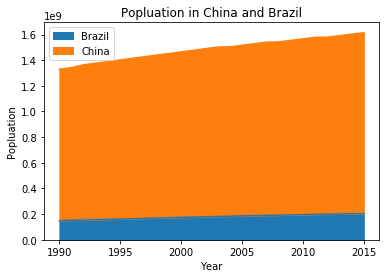

In [21]:
#Popluation
#To show population growth rate in both countries during the period.
p= pop_frame.plot(kind='area');
p.set_xlabel('Year');
p.set_ylabel('Popluation');
p.set_title('Popluation in China and Brazil');

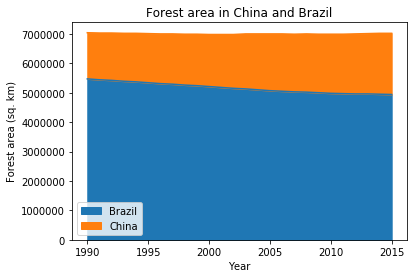

In [22]:
#Forest area (sq. km)
#To show altering a forest area in both countries during the period.
f= forest_frame.plot(kind='area');
f.set_ylabel('Forest area (sq. km)');
f.set_xlabel('Year');
f.set_title('Forest area in China and Brazil');

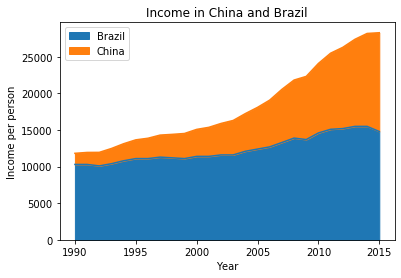

In [448]:
#Income per person (GDP/capita, PPP$ inflation-adjusted)
#To show the change in an individual income in both countries during the period. 
i= income_frame.plot(kind='area');
i.set_xlabel('Year');
i.set_ylabel('Income per person');
i.set_title('Income in China and Brazil');

### What is the relationship between population growth rate and forest area? 

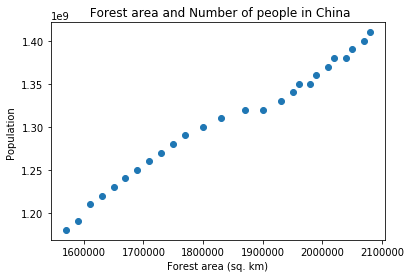

In [23]:
x= forest_frame.China 
y= pop_frame.China
plt.scatter(x, y);
plt.xlabel('Forest area (sq. km)');
plt.ylabel('Population ');
plt.title(' Forest area and Number of people in China');
#postive correlation between population and Forest area in China

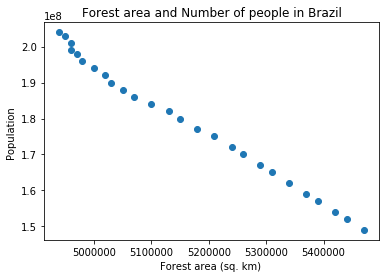

In [450]:
x= forest_frame.Brazil 
y= pop_frame.Brazil
plt.scatter(x, y);
plt.xlabel('Forest area (sq. km) ');
plt.ylabel('Population ');
plt.title('Forest area and Number of people in Brazil');
#negative correlation between population and Forest area in China

### What is the relationship between population growth rate and individual income rate? 

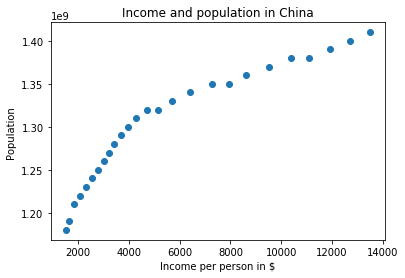

In [451]:
x= income_frame.China 
y= pop_frame.China
plt.scatter(x, y);
plt.xlabel('Income per person in $');
plt.ylabel('Population ');
plt.title('Income and population in China');
#postive correlation between population and Income per person  in China

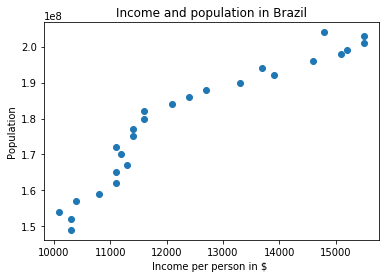

In [452]:
x= income_frame.Brazil 
y= pop_frame.Brazil
plt.scatter(x, y);
plt.xlabel('Income per person in $ ');
plt.ylabel('Population');
plt.title('Income and population in Brazil');
#postive correlation between population and Income per person in Brazil

--------------------------------------------------------------------------------------
<a id='conclusions'></a>
## Conclusions
### Results:
1. The population growth rate shows a gradual increase in China as well as a stable in Brazel 
2. The forest area graph shows that China has approxmitly 70M sq. km of forest are does not derease while Brazil records decrease from 60M sq. km to 55M sq.km between 1990 and 2015.
3. The income graphs shows that individual income rate in China has seen rocketed increase in the period while Brazilian income rate was increased gradually and started decreasing in 2013.
4. China has seen postive relation between poopulation rate and forest area and income rate. 
5. Brazil has seen a positve realtion between  the population rate and income rate and anegative correlation with forest area. 


### Limitions:
1. The analysis indicates that population factor has not solety correlation with forest area.
2. The data does not provide details about people distribution and what type of their activities are influence on forest area.

In [453]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255